In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading in csv files as DF
city_data = pd.read_csv('Instructions/Pyber/raw_data/city_data.csv')
ride_data = pd.read_csv('Instructions/Pyber/raw_data/ride_data.csv')
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
#merge the two, this is the template to build other DF
city_ride_df = pd.merge(city_data, ride_data, on = 'city')
#check for missing values...none
city_ride_df.count()

city            2407
driver_count    2407
type            2407
date            2407
fare            2407
ride_id         2407
dtype: int64

In [9]:
#setting up DF based on city type (suburban, urban, rural)
urban = city_ride_df.loc[city_ride_df['type'] == 'Urban']
suburb = city_ride_df.loc[city_ride_df['type'] == "Suburban"]
rural = city_ride_df.loc[city_ride_df['type'] == 'Rural']

In [23]:
#finding average fare, number of drivers, and total rides based on each city type

#Number of Drivers, droping duplicates, keeping the city and driver_count column, first appearance
urban_drop = urban.drop_duplicates(subset = ['city', 'driver_count'], keep = 'first')
suburb_drop = suburb.drop_duplicates(subset = ['city', 'driver_count'], keep = 'first')
rural_drop = rural.drop_duplicates(subset = ['city', 'driver_count'], keep = 'first')

#Grouping drivers by city so we can find the number of drivers in each city within each city type
urban_drivers = urban_drop.groupby('city')['driver_count'].sum()
suburb_drivers = suburb_drop.groupby('city')['driver_count'].sum()
rural_drivers = rural_drop.groupby('city')['driver_count'].sum()

#Number of Rides
urban_ride = urban.groupby('city')['ride_id'].count()
suburb_ride = suburb.groupby('city')['ride_id'].count()
rural_ride = rural.groupby('city')['ride_id'].count()

#Average Fares
urban_avg = urban.groupby('city')['fare'].mean()
suburb_avg = suburb.groupby('city')['fare'].mean()
rural_avg = rural.groupby('city')['fare'].mean()

#this has values as unique instances

In [24]:
#forming the DF from the unique instances above
urban_df = pd.DataFrame({'Urban Avg': urban_avg, 'Urban Rides':urban_ride, 'Urban Drivers':urban_drivers})
suburb_df = pd.DataFrame({'Suburban Avg': suburb_avg, 'Suburban Rides':suburb_ride, 'Suburban Drivers':suburb_drivers})
rural_df = pd.DataFrame({'Rural Avg': rural_avg, 'Rural Rides':rural_ride, 'Rural Drivers':rural_drivers})

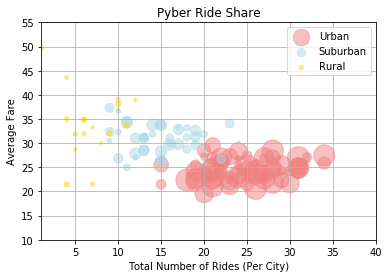

In [48]:
#plotting first graph
plt.scatter(urban_ride, urban_avg, s=urban_drivers * 7, color = 'lightcoral', label='Urban',alpha=0.5)
plt.scatter(suburb_ride, suburb_avg, s=suburb_drivers * 5, color = 'lightblue', label='Suburban',alpha=0.5)
plt.scatter(rural_ride, rural_avg,s =rural_drivers * 3, color = 'gold', label='Rural',alpha=0.5)
plt.grid()
plt.title('Pyber Ride Share')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare')
plt.xlim(1, 40)
plt.ylim(10, 55)
lgnd = plt.legend(scatterpoints = 1)
plt.show()

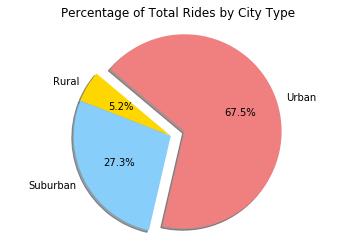

In [49]:
#starting pie charts__Percent of Rides by area type
#finding total number of rides to reference percents of each type

total_rides = city_ride_df['type'].count()

#looking for fares by city type
rural = city_ride_df.loc[city_ride_df['type'] == 'Rural', :]
num_rural = rural['type'].count()
percent_rural = (num_rural / total_rides) * 100

suburban = city_ride_df.loc[city_ride_df['type'] ==  'Suburban', :]
num_sub = suburban['type'].count()
percent_sub = (num_sub / total_rides) * 100

urban = city_ride_df.loc[city_ride_df['type'] ==  'Urban', :]
num_urban = urban['type'].count()
percent_urban = (num_urban / total_rides) * 100

#making pie chart with the percents
labels = ['Rural', 'Suburban', 'Urban']
pie_types = [percent_rural, percent_sub, percent_urban]
explode = (0, 0, 0.15)
colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(pie_types, explode = explode, colors = colors, labels = labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Total Rides by City Type')
plt.show()

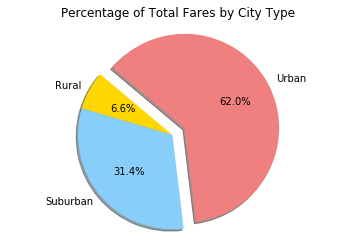

In [50]:
#Percent of Total Fares by City Type
total_fare = sum(city_ride_df['fare'])

#Finding total fares by city type
rural_fare = city_ride_df.loc[city_ride_df['type'] == 'Rural', :]
sum_rural = rural_fare['fare'].sum()
perc_rural_fare = (sum_rural / total_fare) * 100

suburban_fare = city_ride_df.loc[city_ride_df['type'] ==  'Suburban', :]
sum_sub = suburban_fare['fare'].sum()
perc_sub_fare = (sum_sub / total_fare) * 100


urban_fare = city_ride_df.loc[city_ride_df['type'] ==  'Urban', :]
sum_urban = urban_fare['fare'].sum()
perc_urban_fare = (sum_urban / total_fare) * 100

#pie charts that show percentage of fares
labels = ['Rural', 'Suburban', 'Urban']
pie_types_fare = [perc_rural_fare, perc_sub_fare, perc_urban_fare]
explode = (0, 0, 0.15)
colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(pie_types_fare, explode = explode, colors = colors, labels = labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Total Fares by City Type')
plt.show()

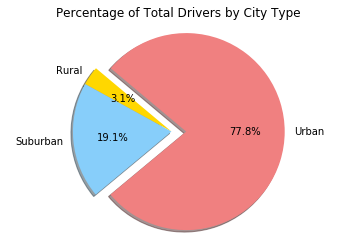

In [51]:
# finding total drivers by city type
total_driver = sum(city_data['driver_count'])

#Finding total fares by city type
rural_driver = city_data.loc[city_data['type'] == 'Rural', :]
sum_rural_driver = sum(rural_driver['driver_count'])

sub_driver = city_data.loc[city_data['type'] == 'Suburban', :]
sum_sub_driver = sum(sub_driver['driver_count'])

urban_driver = city_data.loc[city_data['type'] == 'Urban', :]
sum_urban_driver = sum(urban_driver['driver_count'])

#had to do total drivers after getting the sums of the city types
#total_driver = sum_rural_driver + sum_sub_driver + sum_urban_driver

perc_rural_driver = (sum_rural_driver / total_driver) * 100
perc_sub_driver = (sum_sub_driver / total_driver) * 100
perc_urban_driver = (sum_urban_driver / total_driver) * 100

#pie charts that show percentage of fares
labels = ['Rural', 'Suburban', 'Urban']
pie_types_fare = [perc_rural_driver, perc_sub_driver, perc_urban_driver]
explode = (0, 0, 0.15)
colors = ['gold', 'lightskyblue', 'lightcoral']

plt.pie(pie_types_fare, explode = explode, colors = colors, labels = labels, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Total Drivers by City Type')
plt.show()